In [1]:
 %reload_ext autoreload

import torch
import torch.nn.functional as F
import model, utils
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
from torchvision import transforms

In [2]:
device = utils.get_device()

CUDA Available:  False


In [3]:
x, y = 28, 28
mean = 0.1307
std = 0.3081

In [4]:
train_transforms = transforms.Compose([
                    # Instead of 22 it would be random later on
                    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
                    transforms.Resize((x,  y)),
                    transforms.RandomRotation((-15., 15.), fill=0),
                    transforms.ToTensor(),
                    transforms.Normalize((mean,), (std,)),
                    ])
test_transforms = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((mean,), (std,))
                    ])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

/home/vmistry/.local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
batch_size = 256

kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(train_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

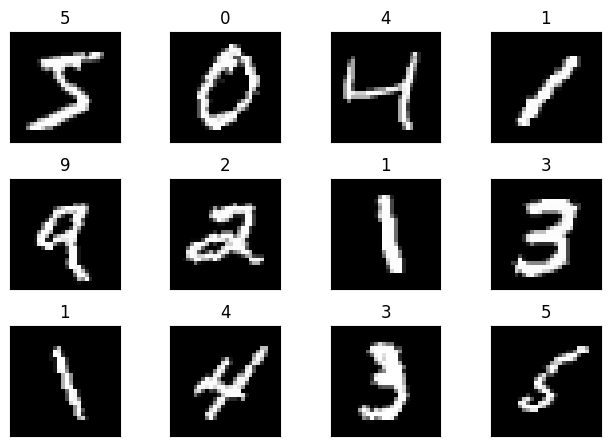

In [7]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [8]:
cnn_model = utils.send_model_to_device(model.Net, device)

In [9]:
optimizer = optim.SGD(cnn_model.parameters(), lr=0.015, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)

Adjusting learning rate of group 0 to 1.5000e-02.


In [10]:
utils.run_for_epoch(20, cnn_model, device, train_loader, test_loader, optimizer, scheduler)
utils.get_model_summary(cnn_model, device, x, y)

Epoch 1


Train: Loss=0.2066 Batch_id=234 Accuracy=78.69: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:42<00:00,  2.30it/s]


Test set: Average loss: 0.1305, Accuracy: 57527/60000 (95.88%)

Adjusting learning rate of group 0 to 1.5000e-02.
Epoch 2


Train: Loss=0.2169 Batch_id=234 Accuracy=96.72: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:41<00:00,  2.33it/s]


Test set: Average loss: 0.0829, Accuracy: 58457/60000 (97.43%)

Adjusting learning rate of group 0 to 1.5000e-02.
Epoch 3


Train: Loss=0.1826 Batch_id=234 Accuracy=97.74: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:39<00:00,  2.35it/s]


Test set: Average loss: 0.0680, Accuracy: 58674/60000 (97.79%)

Adjusting learning rate of group 0 to 1.5000e-02.
Epoch 4


Train: Loss=0.2014 Batch_id=234 Accuracy=98.03: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:40<00:00,  2.34it/s]


Test set: Average loss: 0.0616, Accuracy: 58801/60000 (98.00%)

Adjusting learning rate of group 0 to 1.5000e-02.
Epoch 5


Train: Loss=0.1592 Batch_id=234 Accuracy=98.47: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:39<00:00,  2.35it/s]


Test set: Average loss: 0.0478, Accuracy: 59102/60000 (98.50%)

Adjusting learning rate of group 0 to 1.5000e-02.
Epoch 6


Train: Loss=0.1197 Batch_id=234 Accuracy=98.54: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:39<00:00,  2.36it/s]


Test set: Average loss: 0.0414, Accuracy: 59208/60000 (98.68%)

Adjusting learning rate of group 0 to 1.5000e-02.
Epoch 7


Train: Loss=0.1284 Batch_id=234 Accuracy=98.75: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:40<00:00,  2.34it/s]


Test set: Average loss: 0.0395, Accuracy: 59243/60000 (98.74%)

Adjusting learning rate of group 0 to 1.5000e-02.
Epoch 8


Train: Loss=0.1235 Batch_id=234 Accuracy=98.94: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:39<00:00,  2.36it/s]


Test set: Average loss: 0.0358, Accuracy: 59320/60000 (98.87%)

Adjusting learning rate of group 0 to 1.5000e-02.
Epoch 9


Train: Loss=0.1140 Batch_id=234 Accuracy=98.96: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:42<00:00,  2.29it/s]


Test set: Average loss: 0.0366, Accuracy: 59287/60000 (98.81%)

Adjusting learning rate of group 0 to 1.5000e-02.
Epoch 10


Train: Loss=0.1121 Batch_id=234 Accuracy=99.06: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:41<00:00,  2.31it/s]


Test set: Average loss: 0.0336, Accuracy: 59366/60000 (98.94%)

Adjusting learning rate of group 0 to 1.5000e-03.
Epoch 11


Train: Loss=0.1061 Batch_id=234 Accuracy=99.26: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:39<00:00,  2.36it/s]


Test set: Average loss: 0.0202, Accuracy: 59639/60000 (99.40%)

Adjusting learning rate of group 0 to 1.5000e-03.
Epoch 12


Train: Loss=0.1009 Batch_id=234 Accuracy=99.38: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:40<00:00,  2.34it/s]


Test set: Average loss: 0.0196, Accuracy: 59637/60000 (99.39%)

Adjusting learning rate of group 0 to 1.5000e-03.
Epoch 13


Train: Loss=0.1181 Batch_id=234 Accuracy=99.40: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:39<00:00,  2.37it/s]


Test set: Average loss: 0.0196, Accuracy: 59641/60000 (99.40%)

Adjusting learning rate of group 0 to 1.5000e-03.
Epoch 14


Train: Loss=0.1398 Batch_id=234 Accuracy=99.38: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:40<00:00,  2.34it/s]


Test set: Average loss: 0.0184, Accuracy: 59680/60000 (99.47%)

Adjusting learning rate of group 0 to 1.5000e-03.
Epoch 15


Train: Loss=0.1151 Batch_id=234 Accuracy=99.43: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:40<00:00,  2.35it/s]


Test set: Average loss: 0.0178, Accuracy: 59666/60000 (99.44%)

Adjusting learning rate of group 0 to 1.5000e-03.
Epoch 16


Train: Loss=0.1075 Batch_id=234 Accuracy=99.47: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:39<00:00,  2.37it/s]


Test set: Average loss: 0.0179, Accuracy: 59655/60000 (99.42%)

Adjusting learning rate of group 0 to 1.5000e-03.
Epoch 17


Train: Loss=0.1078 Batch_id=234 Accuracy=99.42: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:39<00:00,  2.36it/s]


Test set: Average loss: 0.0182, Accuracy: 59666/60000 (99.44%)

Adjusting learning rate of group 0 to 1.5000e-03.
Epoch 18


Train: Loss=0.0978 Batch_id=234 Accuracy=99.47: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:39<00:00,  2.37it/s]


Test set: Average loss: 0.0163, Accuracy: 59711/60000 (99.52%)

Adjusting learning rate of group 0 to 1.5000e-03.
Epoch 19


Train: Loss=0.0898 Batch_id=234 Accuracy=99.45: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:40<00:00,  2.35it/s]


Test set: Average loss: 0.0168, Accuracy: 59690/60000 (99.48%)

Adjusting learning rate of group 0 to 1.5000e-03.
Epoch 20


Train: Loss=0.1079 Batch_id=234 Accuracy=99.44: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:40<00:00,  2.35it/s]


Test set: Average loss: 0.0169, Accuracy: 59697/60000 (99.50%)

Adjusting learning rate of group 0 to 1.5000e-04.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


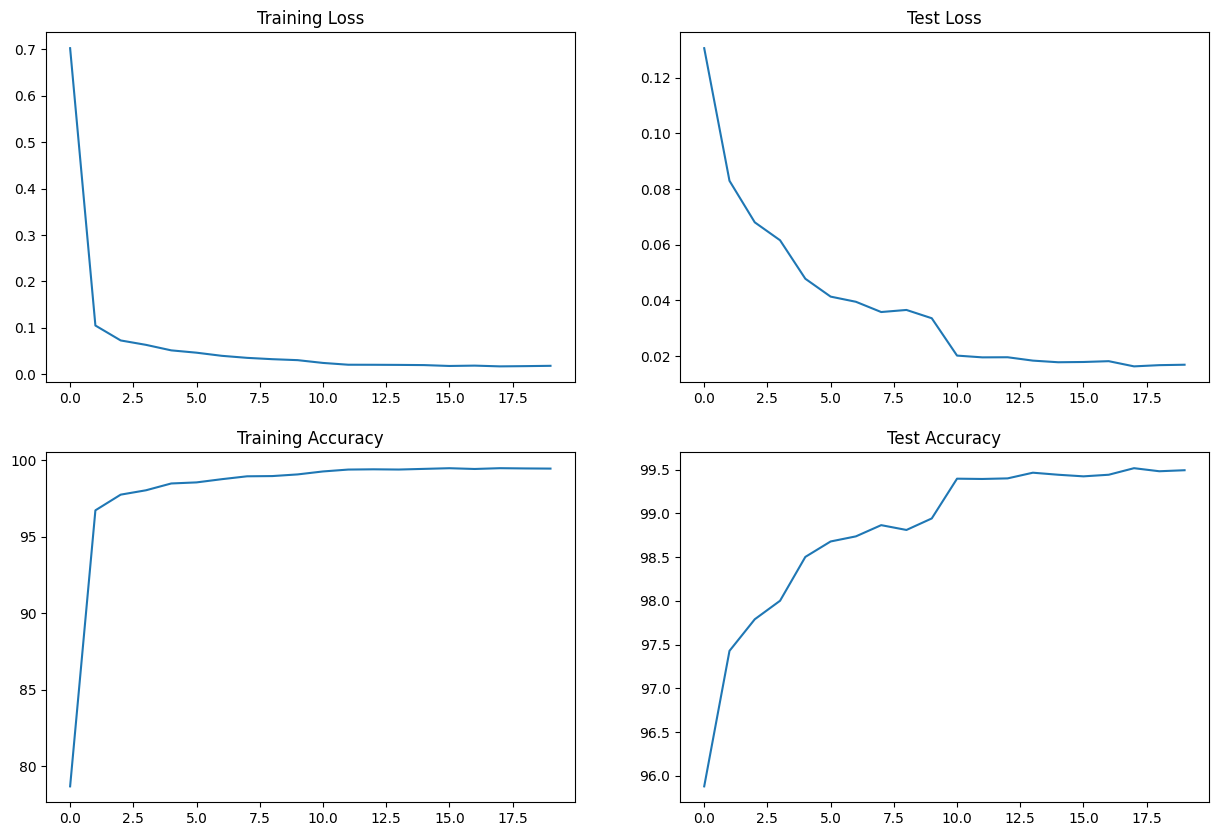

In [11]:
utils.plot_loss_accuracy_graph()